# Imports

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join('../../../src/'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import numpy as np
import torch
import time
import pytorch_lightning as pl
from pytorch_lightning import loggers
import config
from utils.Visual import draw_plot

# Run Adversarial Training

In [ ]:
##############################################################################################################
##############################################################################################################
##############################################################################################################
from utils.TrainHelper import TrainHelper, get_all_models_data
from attacks.pgd import ProjectedGradientDescent

from classification.models.M5 import M5PLModule
from classification.models.SpectrogramCNN import SpectrogramCNNPLModule
from classification.models.CRNN import CRNNPLModule

# define hyperparameters
hparams = {
    "batch_size": 24,
    "learning_rate": 0.002,
    "weight_decay": 0.01,
    "lr_decay": 1,
    "epochs": 20
}

# define attack configs
attack_configs = [
                  {"ATTACK_CLASS": ProjectedGradientDescent, 
                   "ATTACK_ARGS": {"norm":["inf"], 
                                   "epsilon":[0.1], "num_iter": [1]
                                 },
                   "META": {"TITLE": "L_inf_eps=0.1_iters=1"}
                   },
                  {"ATTACK_CLASS": ProjectedGradientDescent, 
                   "ATTACK_ARGS": {"norm":["inf"], 
                                   "epsilon":[0.2], "num_iter": [1]
                                 },
                   "META": {"TITLE": "L_inf_eps=0.2_iters=1"}
                   },
                  {"ATTACK_CLASS": ProjectedGradientDescent, 
                   "ATTACK_ARGS": {"norm":["inf"], 
                                   "epsilon":[0.3], "num_iter": [1]
                                 },
                   "META": {"TITLE": "L_inf_eps=0.3_iters=1"}
                   },
                  {"ATTACK_CLASS": ProjectedGradientDescent, 
                   "ATTACK_ARGS": {"norm":["inf"], 
                                   "epsilon":[0.05], "num_iter": [2]
                                 },
                   "META": {"TITLE": "L_inf_eps=0.05_iters=2"}
                   },
                  {"ATTACK_CLASS": ProjectedGradientDescent, 
                   "ATTACK_ARGS": {"norm":["inf"], 
                                   "epsilon":[0.07], "num_iter": [2]
                                 },
                   "META": {"TITLE": "L_inf_eps=0.07_iters=2"}
                   },
                  {"ATTACK_CLASS": ProjectedGradientDescent, 
                   "ATTACK_ARGS": {"norm":["inf"], 
                                   "epsilon":[0.03], "num_iter": [2]
                                 },
                   "META": {"TITLE": "L_inf_eps=0.03_iters=2"}
                   },
                  {"ATTACK_CLASS": ProjectedGradientDescent, 
                   "ATTACK_ARGS": {"norm":["inf"], 
                                   "epsilon":[0.05], "num_iter": [3]
                                 },
                   "META": {"TITLE": "L_inf_eps=0.05_iters=3"}
                   },
                  ]

th = TrainHelper()
models = th.run(CRNNPLModule, hparams, attack_configs, save_epochs = [100])
##############################################################################################################
##############################################################################################################
##############################################################################################################

loaded!
Training Models with Attack ProjectedGradientDescent (1 of 7)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------
Loading cached training data of dataset 0 from /nfs/students/summer-term-2020/project-4/data/dataset1/dataset_48k/
Loading cached validation data of dataset 0 from /nfs/students/summer-term-2020/project-4/data/dataset1/dataset_48k/


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name                          | Type                  | Params
--------------------------------------------------------------------
0  | model                         | CRNN                  | 255 K 
1  | model.spec                    | MelspectrogramStretch | 0     
2  | model.spec.spectrogram        | Spectrogram           | 0     
3  | model.spec.mel_scale          | MelScale              | 0     
4  | model.spec.stft               | Spectrogram           | 0     
5  | model.spec.random_stretch   

Val-Acc=0.007705986959098993


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.7036158861885004
Train-Acc=0.5883399209486166


Val-Acc=0.6188500296384114
Train-Acc=0.6053359683794466


Val-Acc=0.7848251333728512
Train-Acc=0.6231225296442687


Val-Acc=0.8411381149970362
Train-Acc=0.6090909090909091


Val-Acc=0.8008298755186722
Train-Acc=0.6310276679841897


Val-Acc=0.8073503260225252
Train-Acc=0.642292490118577


Val-Acc=0.8446947243627742
Train-Acc=0.6644268774703558


Val-Acc=0.7006520450503853
Train-Acc=0.6628458498023715


Val-Acc=0.7468879668049793
Train-Acc=0.6737154150197628


Val-Acc=0.6965026674570243
Train-Acc=0.6760869565217391


Val-Acc=0.7403675163011263
Train-Acc=0.692094861660079


Val-Acc=0.8701837581505631
Train-Acc=0.6958498023715415


Val-Acc=0.6206283343212804
Train-Acc=0.6956521739130435


Val-Acc=0.7474807350326023
Train-Acc=0.7025691699604744


Val-Acc=0.7540011855364552
Train-Acc=0.7051383399209487


Val-Acc=0.7842323651452282
Train-Acc=0.7223320158102767


Val-Acc=0.8079430942501482
Train-Acc=0.7164031620553359


Val-Acc=0.7747480735032602
Train-Acc=0.7211462450592885


Val-Acc=0.8126852400711322
Train-Acc=0.7343873517786561


Val-Acc=0.7978660343805573
Train-Acc=0.7290513833992095


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name                          | Type                  | Params
--------------------------------------------------------------------
0  | model                         | CRNN                  | 255 K 
1  | model.spec                    | MelspectrogramStretch | 0     
2  | model.spec.spectrogram        | Spectrogram           | 0     
3  | model.spec.mel_scale          | MelScale              | 0     
4  | model.spec.stft               | Spectrogram           | 0     
5  | model.spec.random_stretch   


Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/CRNN/CRNN_attack_L_inf_eps=0.1_iters=1_v1.p"
Training Models with Attack ProjectedGradientDescent (2 of 7)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.015411973918197985


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.5245998814463545
Train-Acc=0.5413043478260869


Val-Acc=0.8138707765263782
Train-Acc=0.5879446640316206


Val-Acc=0.6763485477178424
Train-Acc=0.5903162055335969


Val-Acc=0.5779490219324244
Train-Acc=0.616403162055336


Val-Acc=0.5293420272673385
Train-Acc=0.6284584980237155


Val-Acc=0.5560165975103735
Train-Acc=0.6636363636363637


Val-Acc=0.5411973918197984
Train-Acc=0.675098814229249


Val-Acc=0.8103141671606402
Train-Acc=0.7029644268774704


Val-Acc=0.5714285714285714
Train-Acc=0.7138339920948616


Val-Acc=0.4902193242442205
Train-Acc=0.7328063241106719


Val-Acc=0.4997036158861885
Train-Acc=0.7308300395256917


Val-Acc=0.4902193242442205
Train-Acc=0.7221343873517787


Val-Acc=0.6259632483698874
Train-Acc=0.7420948616600791


Val-Acc=0.5572021339656195
Train-Acc=0.7361660079051383


# Create Plots

In [9]:
state_dict_path = '/nfs/students/summer-term-2020/project-4/SAVED_MODELS/CRNN/vanilla0.886.p'

In [13]:
from classification.models.DeepRecursiveCNN import DeepRecursiveCNNPLModule
model_state_dict_path = "/nfs/students/summer-term-2020/project-4/yan/models/best_model_state_dict.pt"

In [14]:
from utils.RobustnessExperiment import RobustnessExperiment, load_experiment
experiment = load_experiment(exp_folder = "0015_Evaluation_Final")
experiment.run(state_dict_path, DeepRecursiveCNNPLModule)

Loaded model 0015_Evaluation_Final


KeyError: 'hparams'

Loaded model 0015_Evaluation_Final
Loading cached training data of dataset 0 from /nfs/students/summer-term-2020/project-4/data/dataset1/dataset_48k/
Loading cached validation data of dataset 0 from /nfs/students/summer-term-2020/project-4/data/dataset1/dataset_48k/


  0%|          | 0/10 [00:00<?, ?it/s]



Running experiment on model CRNN_attack_L_inf_eps=0.1_iters=1_v1.p

Perform Attack #1/3: FGSM


100%|██████████| 10/10 [04:48<00:00, 28.87s/it]


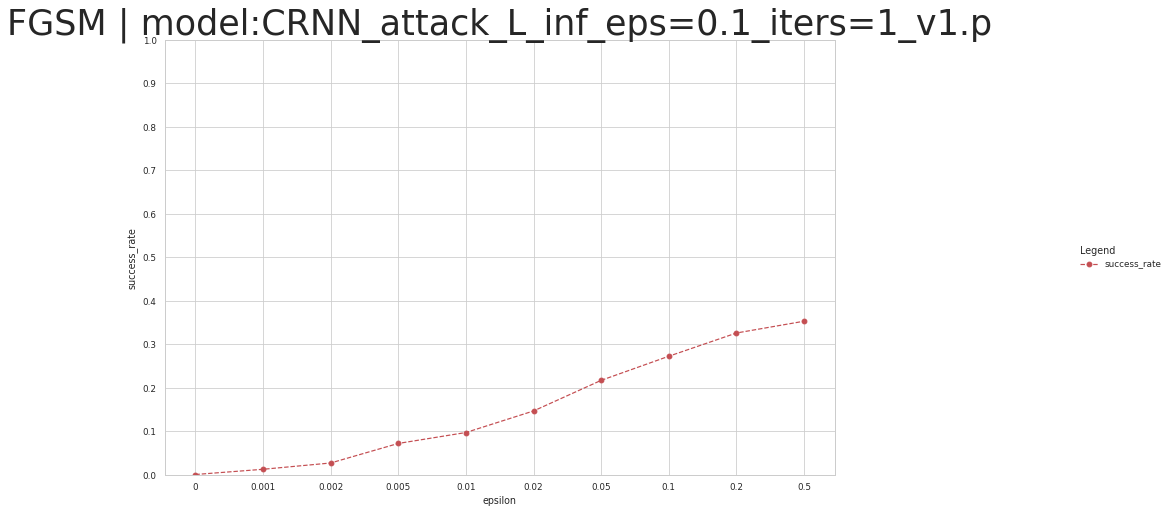

  0%|          | 0/10 [00:00<?, ?it/s]

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0015_Evaluation_Final/backup.pickle"

Perform Attack #2/3: FGSM_2_Iter


100%|██████████| 10/10 [04:00<00:00, 24.09s/it]


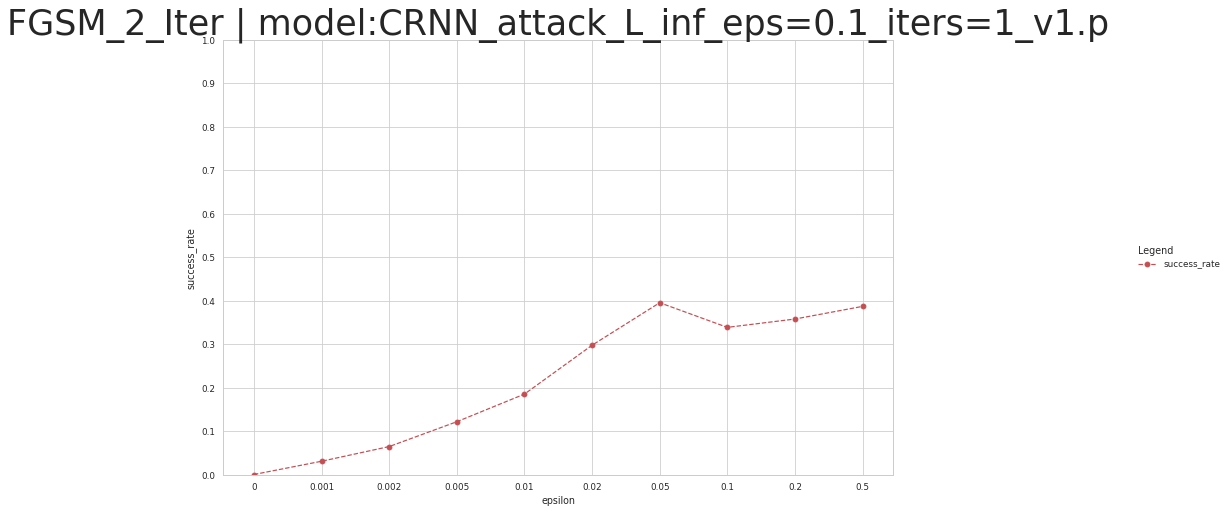

  0%|          | 0/10 [00:00<?, ?it/s]

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0015_Evaluation_Final/backup.pickle"

Perform Attack #3/3: FunctionalVolumeAttack


100%|██████████| 10/10 [04:49<00:00, 28.98s/it]


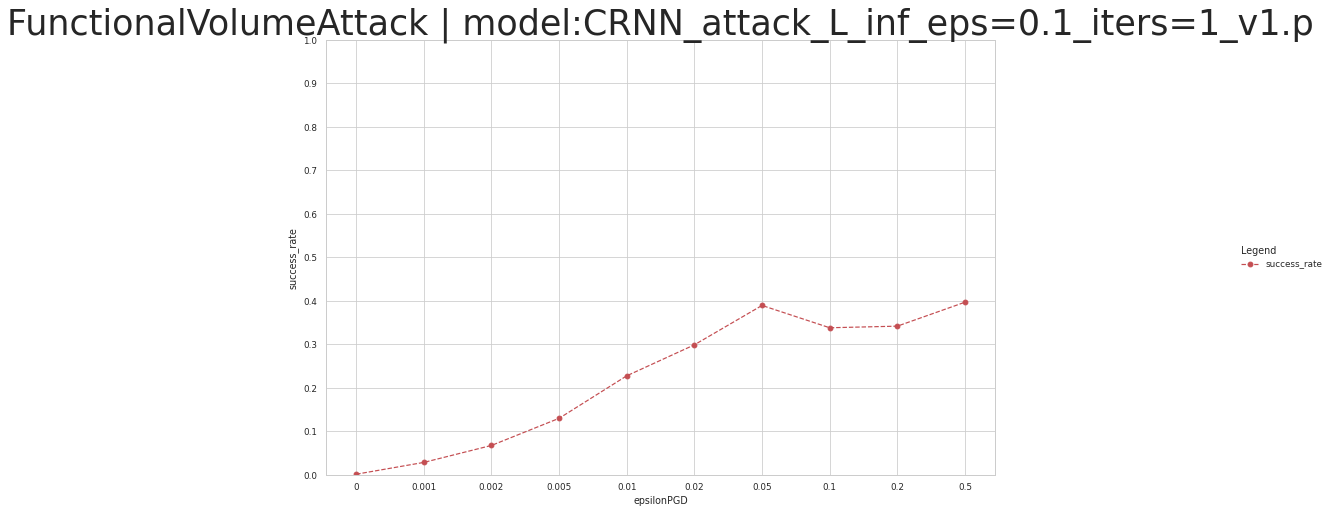

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0015_Evaluation_Final/backup.pickle"
Loading cached training data of dataset 0 from /nfs/students/summer-term-2020/project-4/data/dataset1/dataset_48k/
Loading cached validation data of dataset 0 from /nfs/students/summer-term-2020/project-4/data/dataset1/dataset_48k/


  0%|          | 0/10 [00:00<?, ?it/s]



Running experiment on model CRNN_attack_L_inf_eps=0.2_iters=1_v2.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0015_Evaluation_Final/CRNN_attack_L_inf_eps=0.2_iters=1_v2.p'

Perform Attack #1/3: FGSM


100%|██████████| 10/10 [05:55<00:00, 35.58s/it]


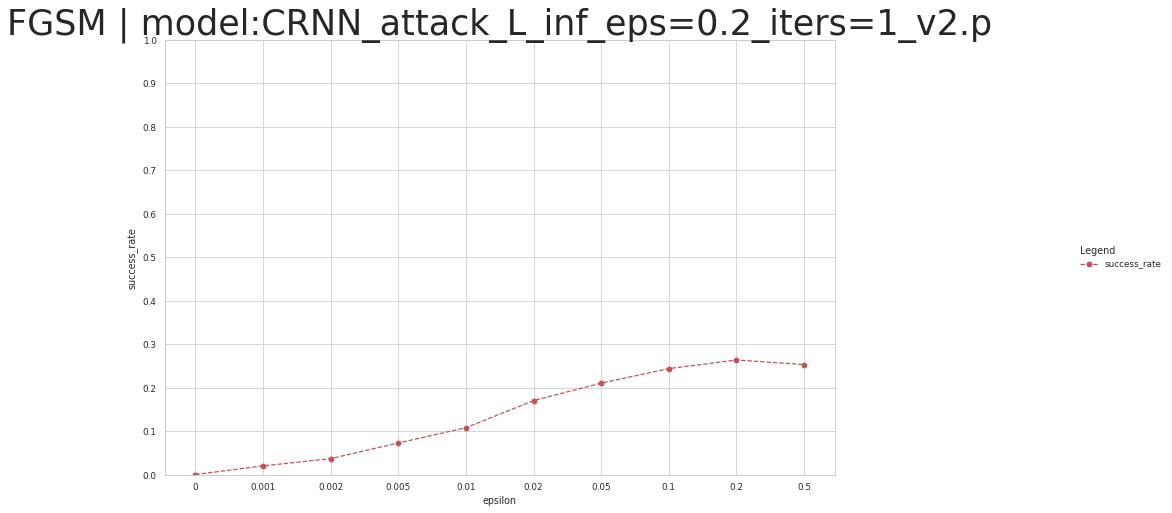

  0%|          | 0/10 [00:00<?, ?it/s]

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0015_Evaluation_Final/backup.pickle"

Perform Attack #2/3: FGSM_2_Iter


100%|██████████| 10/10 [04:16<00:00, 25.63s/it]


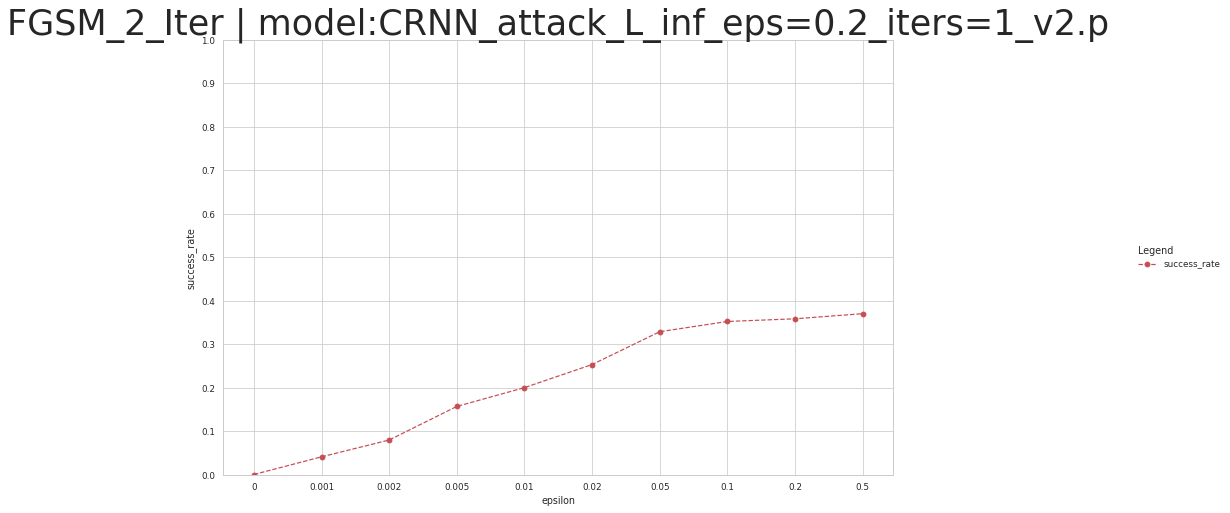

  0%|          | 0/10 [00:00<?, ?it/s]

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0015_Evaluation_Final/backup.pickle"

Perform Attack #3/3: FunctionalVolumeAttack


100%|██████████| 10/10 [04:38<00:00, 27.83s/it]


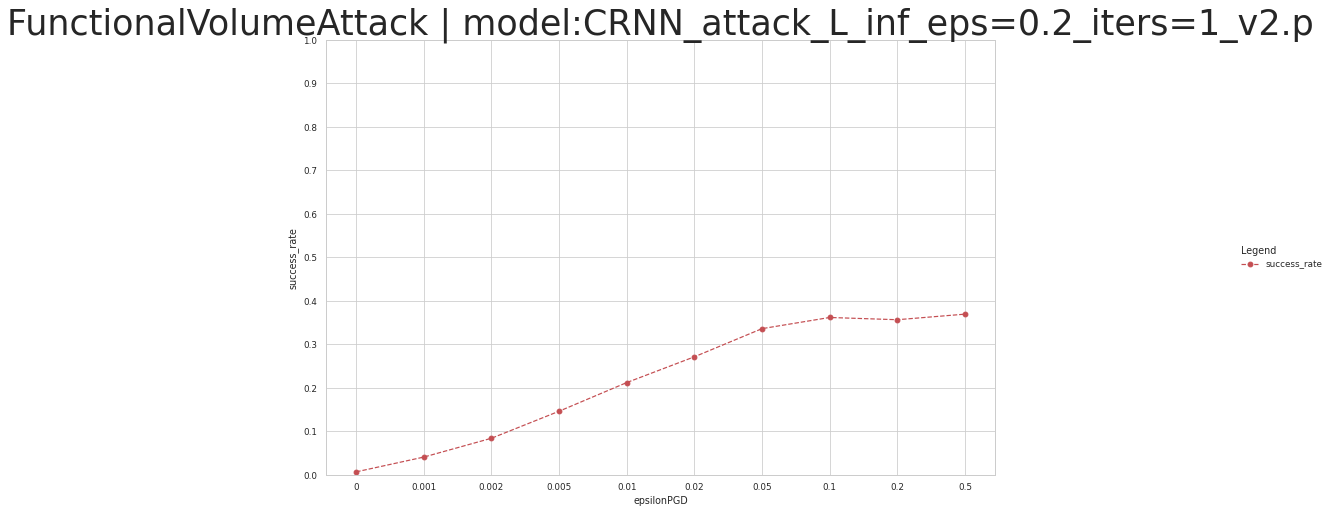

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0015_Evaluation_Final/backup.pickle"
Loading cached training data of dataset 0 from /nfs/students/summer-term-2020/project-4/data/dataset1/dataset_48k/
Loading cached validation data of dataset 0 from /nfs/students/summer-term-2020/project-4/data/dataset1/dataset_48k/


  0%|          | 0/10 [00:00<?, ?it/s]



Running experiment on model CRNN_attack_L_inf_eps=0.3_iters=1_v3.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0015_Evaluation_Final/CRNN_attack_L_inf_eps=0.3_iters=1_v3.p'

Perform Attack #1/3: FGSM


100%|██████████| 10/10 [04:12<00:00, 25.24s/it]


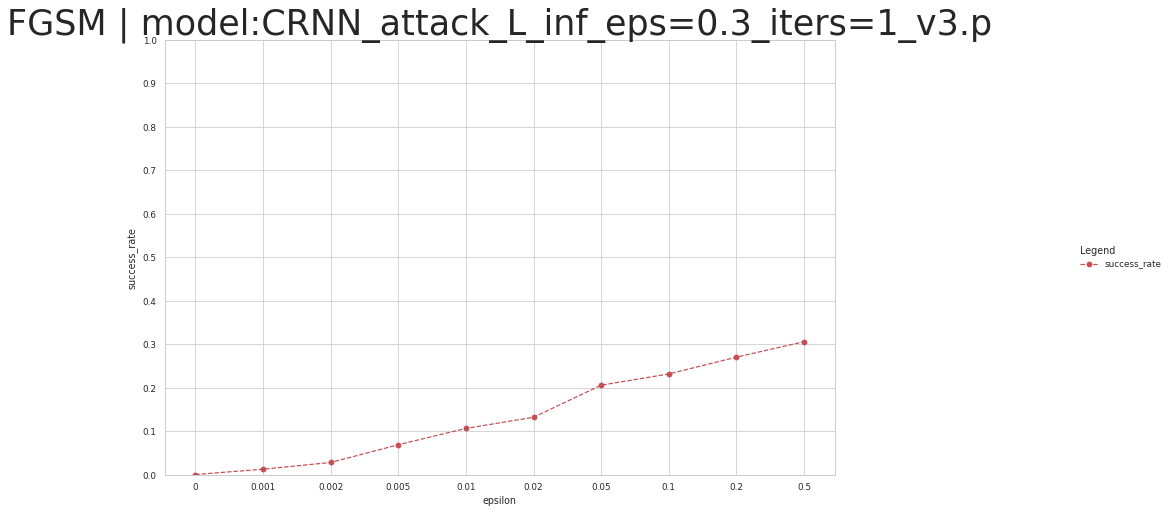

  0%|          | 0/10 [00:00<?, ?it/s]

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0015_Evaluation_Final/backup.pickle"

Perform Attack #2/3: FGSM_2_Iter


100%|██████████| 10/10 [04:24<00:00, 26.48s/it]


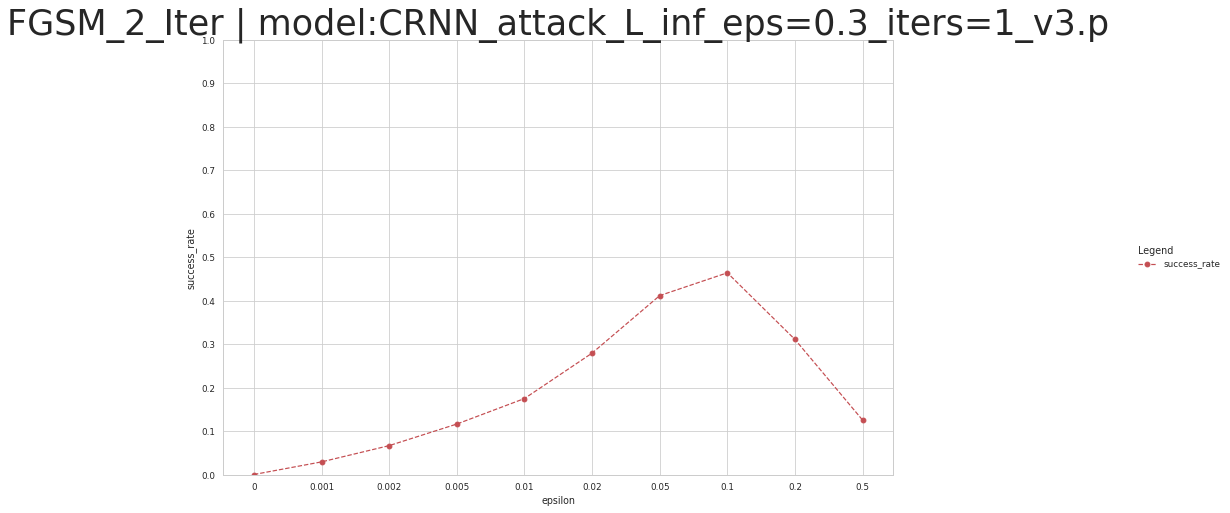

  0%|          | 0/10 [00:00<?, ?it/s]

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0015_Evaluation_Final/backup.pickle"

Perform Attack #3/3: FunctionalVolumeAttack


100%|██████████| 10/10 [05:15<00:00, 31.55s/it]


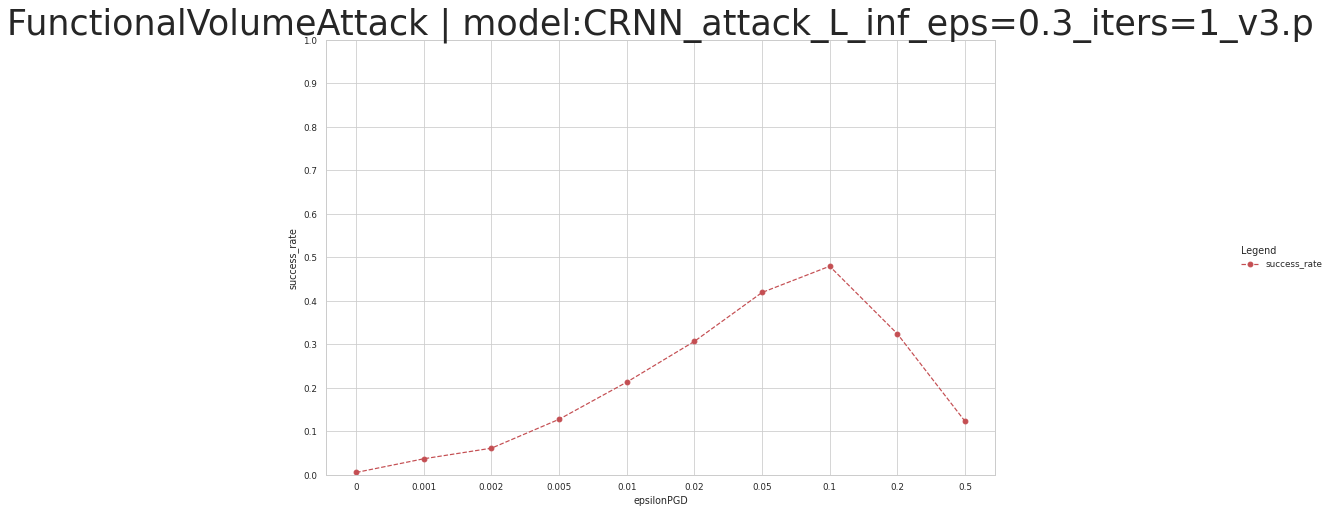

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0015_Evaluation_Final/backup.pickle"
Loading cached training data of dataset 0 from /nfs/students/summer-term-2020/project-4/data/dataset1/dataset_48k/
Loading cached validation data of dataset 0 from /nfs/students/summer-term-2020/project-4/data/dataset1/dataset_48k/


  0%|          | 0/10 [00:00<?, ?it/s]



Running experiment on model CRNN_attack_L_inf_eps=0.05_iters=2_v4.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0015_Evaluation_Final/CRNN_attack_L_inf_eps=0.05_iters=2_v4.p'

Perform Attack #1/3: FGSM


100%|██████████| 10/10 [05:16<00:00, 31.69s/it]


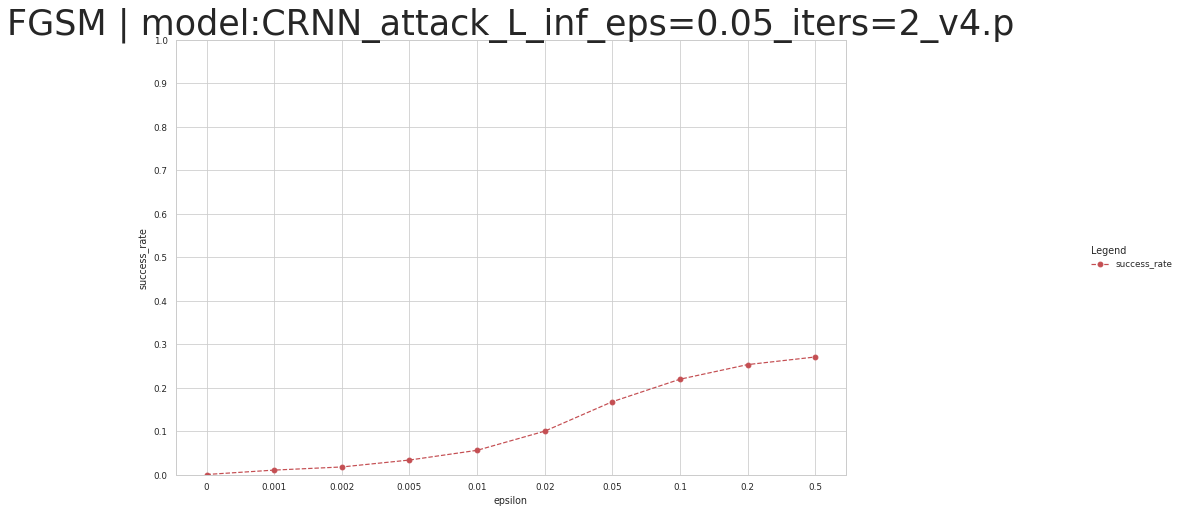

  0%|          | 0/10 [00:00<?, ?it/s]

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0015_Evaluation_Final/backup.pickle"

Perform Attack #2/3: FGSM_2_Iter


100%|██████████| 10/10 [04:59<00:00, 29.96s/it]


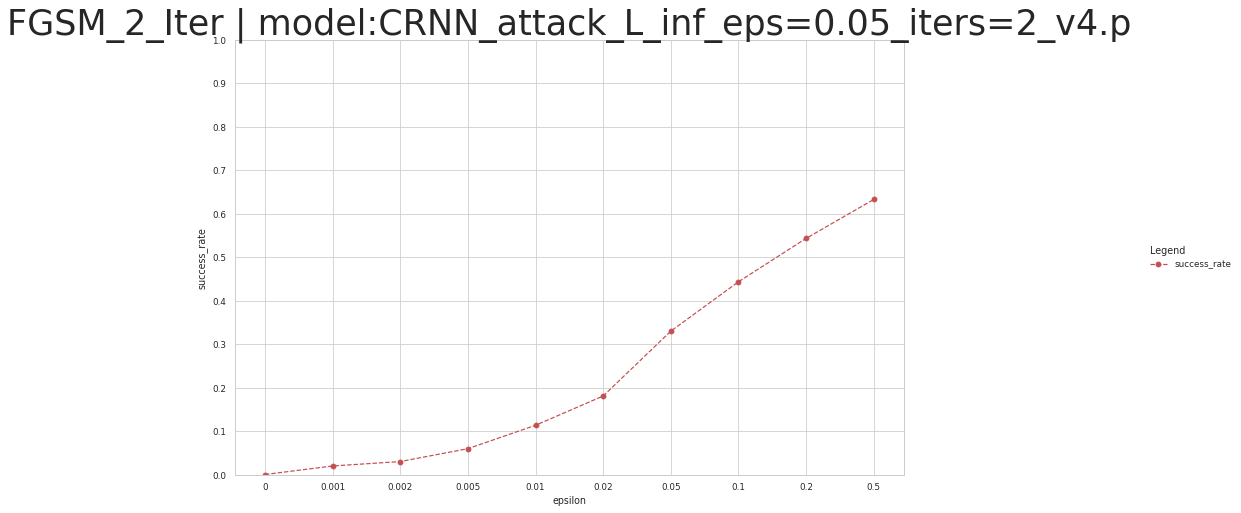

  0%|          | 0/10 [00:00<?, ?it/s]

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0015_Evaluation_Final/backup.pickle"

Perform Attack #3/3: FunctionalVolumeAttack


100%|██████████| 10/10 [05:05<00:00, 30.58s/it]


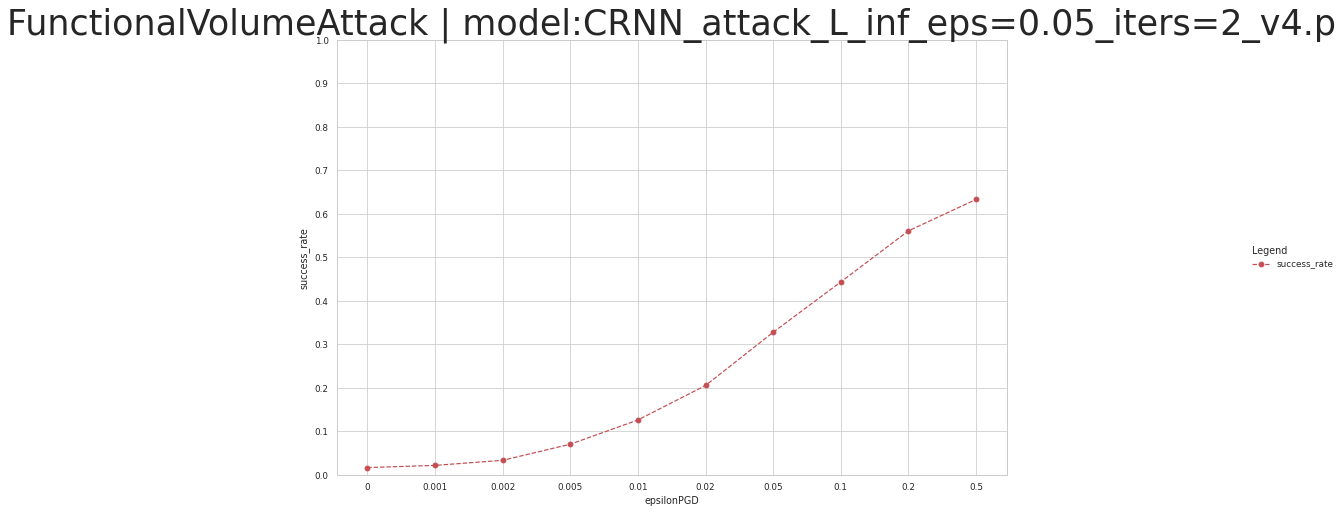

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0015_Evaluation_Final/backup.pickle"
Loading cached training data of dataset 0 from /nfs/students/summer-term-2020/project-4/data/dataset1/dataset_48k/
Loading cached validation data of dataset 0 from /nfs/students/summer-term-2020/project-4/data/dataset1/dataset_48k/


  0%|          | 0/10 [00:00<?, ?it/s]



Running experiment on model CRNN_attack_L_inf_eps=0.07_iters=2_v5.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0015_Evaluation_Final/CRNN_attack_L_inf_eps=0.07_iters=2_v5.p'

Perform Attack #1/3: FGSM


100%|██████████| 10/10 [04:05<00:00, 24.58s/it]


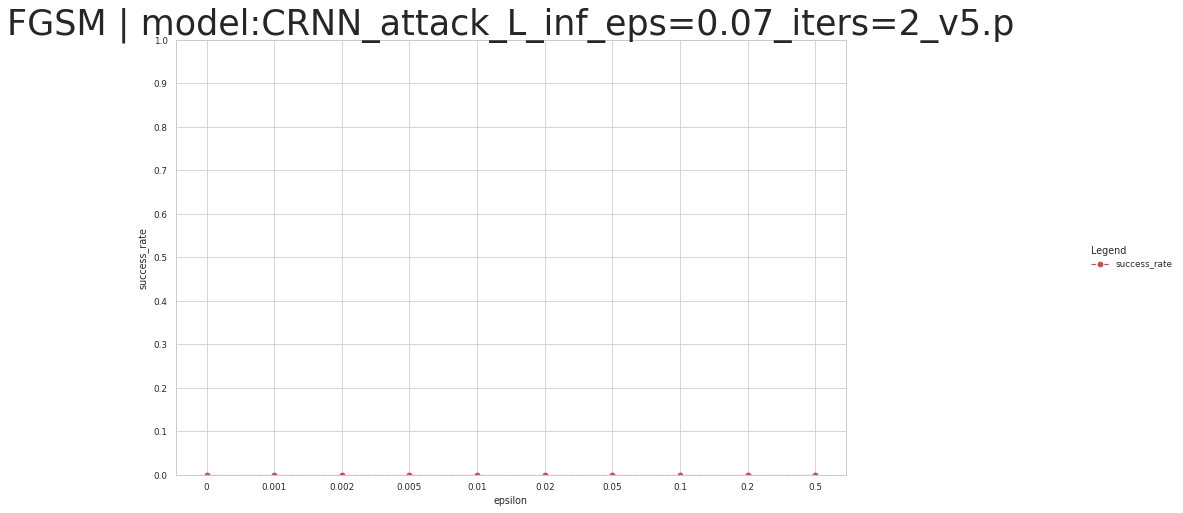

  0%|          | 0/10 [00:00<?, ?it/s]

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0015_Evaluation_Final/backup.pickle"

Perform Attack #2/3: FGSM_2_Iter


100%|██████████| 10/10 [02:56<00:00, 17.61s/it]


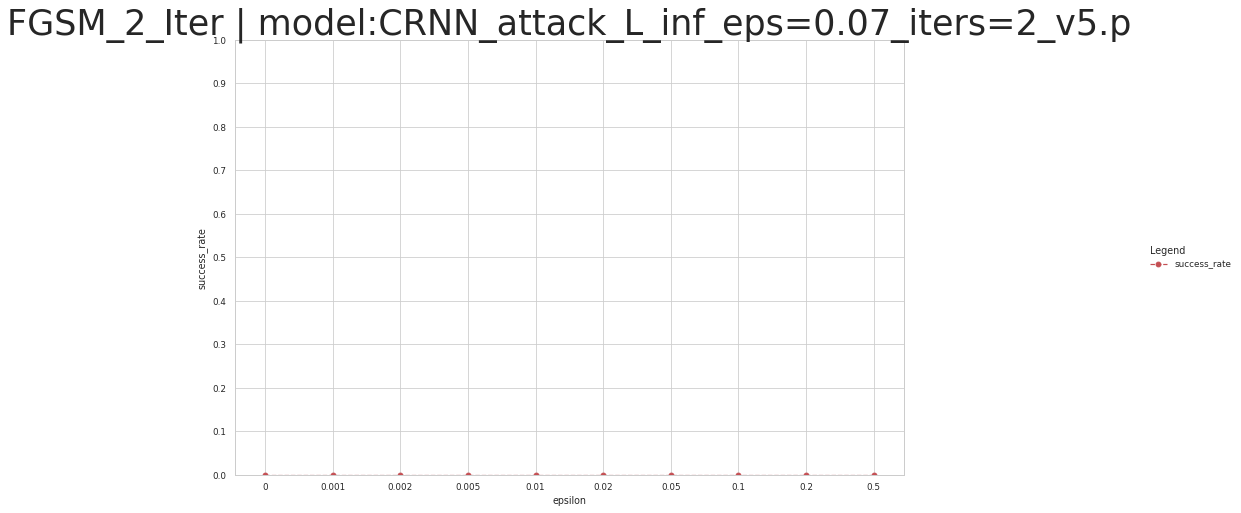

  0%|          | 0/10 [00:00<?, ?it/s]

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0015_Evaluation_Final/backup.pickle"

Perform Attack #3/3: FunctionalVolumeAttack


100%|██████████| 10/10 [03:16<00:00, 19.65s/it]


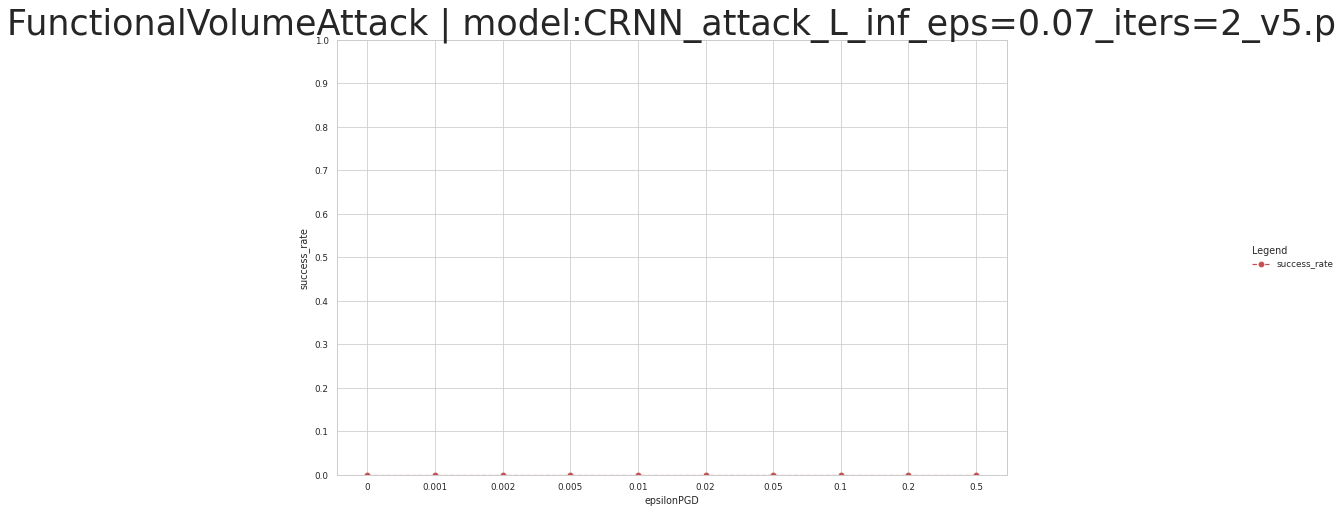

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0015_Evaluation_Final/backup.pickle"
Loading cached training data of dataset 0 from /nfs/students/summer-term-2020/project-4/data/dataset1/dataset_48k/
Loading cached validation data of dataset 0 from /nfs/students/summer-term-2020/project-4/data/dataset1/dataset_48k/


  0%|          | 0/10 [00:00<?, ?it/s]



Running experiment on model CRNN_attack_L_inf_eps=0.03_iters=2_v6.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0015_Evaluation_Final/CRNN_attack_L_inf_eps=0.03_iters=2_v6.p'

Perform Attack #1/3: FGSM


100%|██████████| 10/10 [03:17<00:00, 19.74s/it]


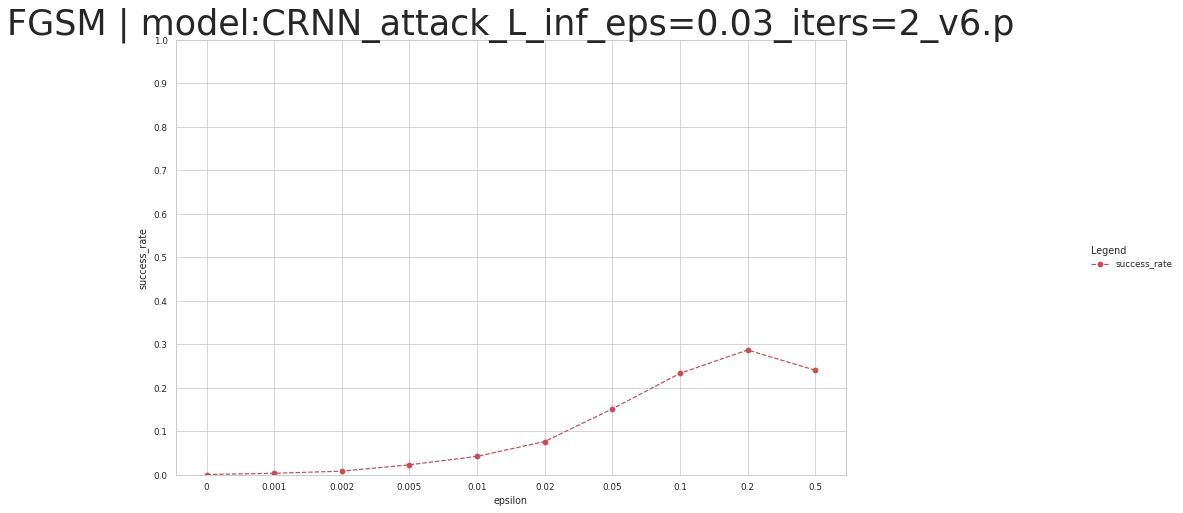

  0%|          | 0/10 [00:00<?, ?it/s]

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0015_Evaluation_Final/backup.pickle"

Perform Attack #2/3: FGSM_2_Iter


100%|██████████| 10/10 [04:01<00:00, 24.12s/it]


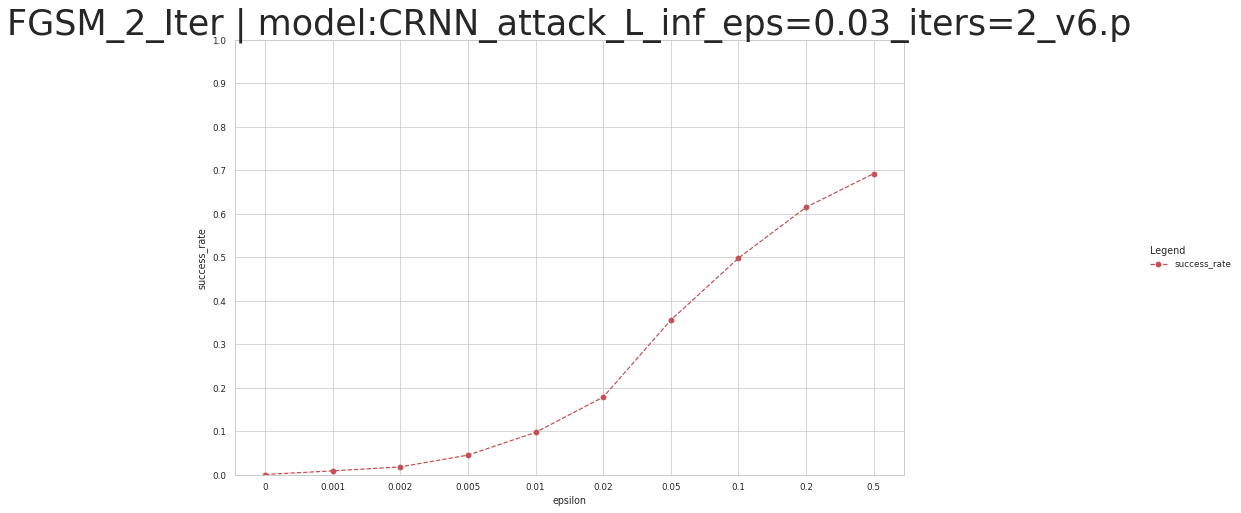

  0%|          | 0/10 [00:00<?, ?it/s]

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0015_Evaluation_Final/backup.pickle"

Perform Attack #3/3: FunctionalVolumeAttack


100%|██████████| 10/10 [04:38<00:00, 27.89s/it]


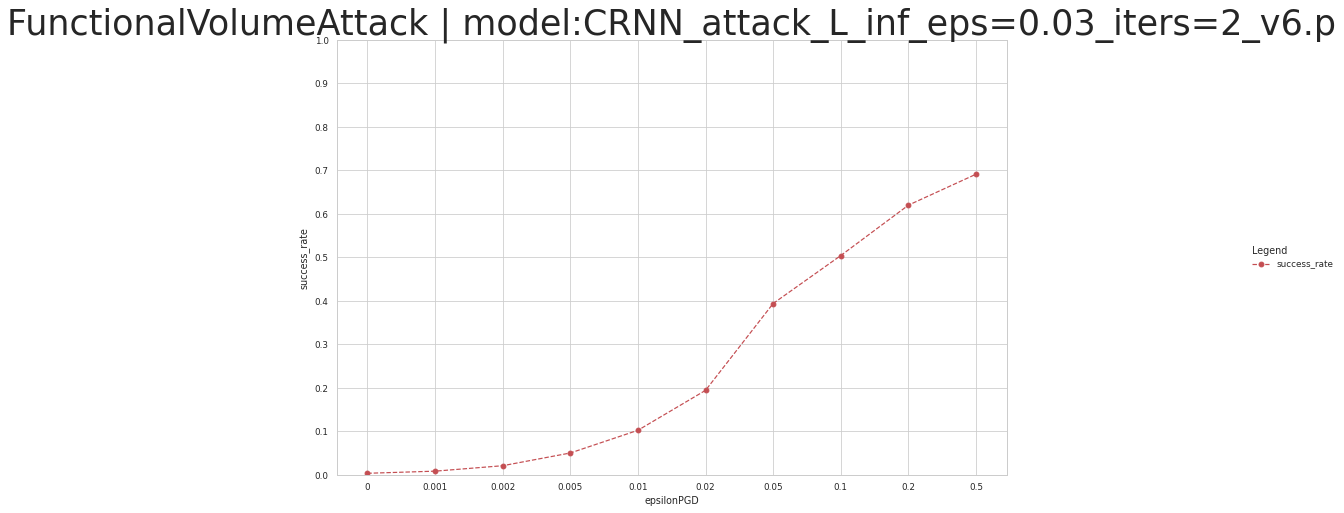

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0015_Evaluation_Final/backup.pickle"
Loading cached training data of dataset 0 from /nfs/students/summer-term-2020/project-4/data/dataset1/dataset_48k/
Loading cached validation data of dataset 0 from /nfs/students/summer-term-2020/project-4/data/dataset1/dataset_48k/


  0%|          | 0/10 [00:00<?, ?it/s]



Running experiment on model CRNN_attack_L_inf_eps=0.05_iters=3_v7.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0015_Evaluation_Final/CRNN_attack_L_inf_eps=0.05_iters=3_v7.p'

Perform Attack #1/3: FGSM


100%|██████████| 10/10 [04:07<00:00, 24.71s/it]


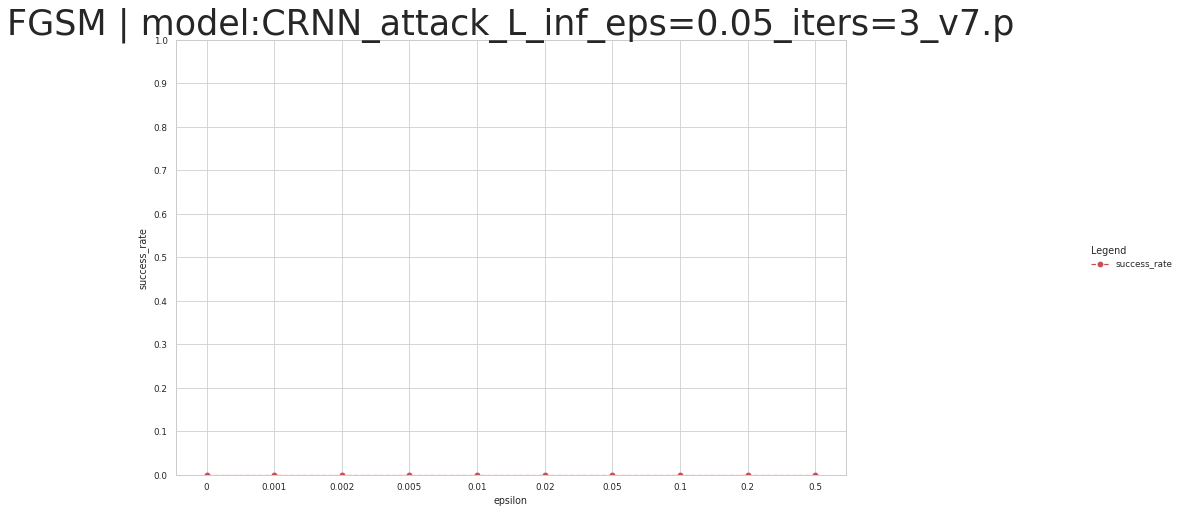

  0%|          | 0/10 [00:00<?, ?it/s]

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0015_Evaluation_Final/backup.pickle"

Perform Attack #2/3: FGSM_2_Iter


100%|██████████| 10/10 [02:55<00:00, 17.54s/it]


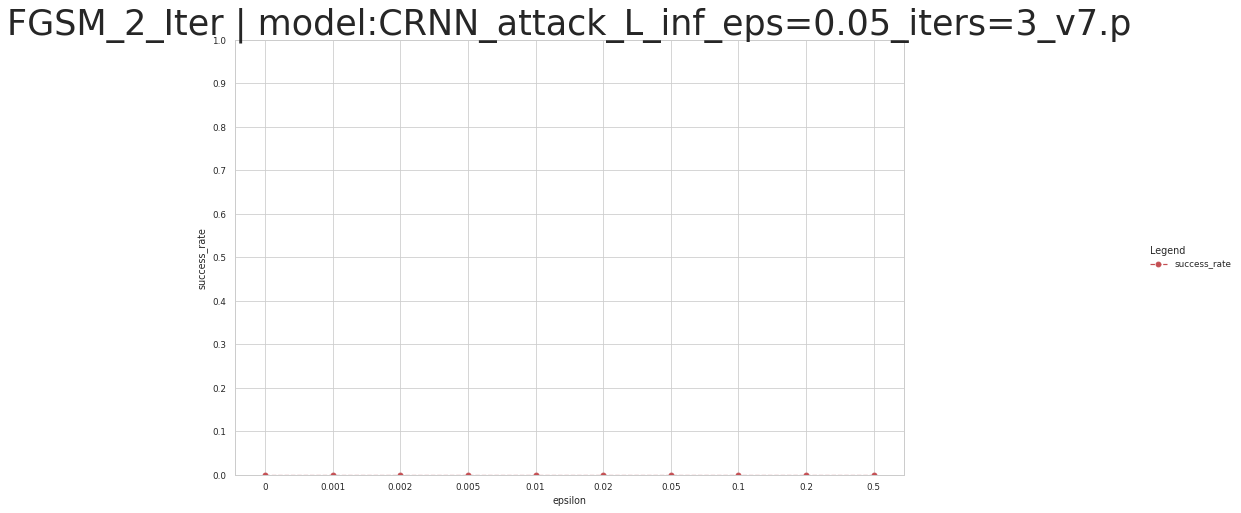

  0%|          | 0/10 [00:00<?, ?it/s]

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0015_Evaluation_Final/backup.pickle"

Perform Attack #3/3: FunctionalVolumeAttack


100%|██████████| 10/10 [03:57<00:00, 23.75s/it]


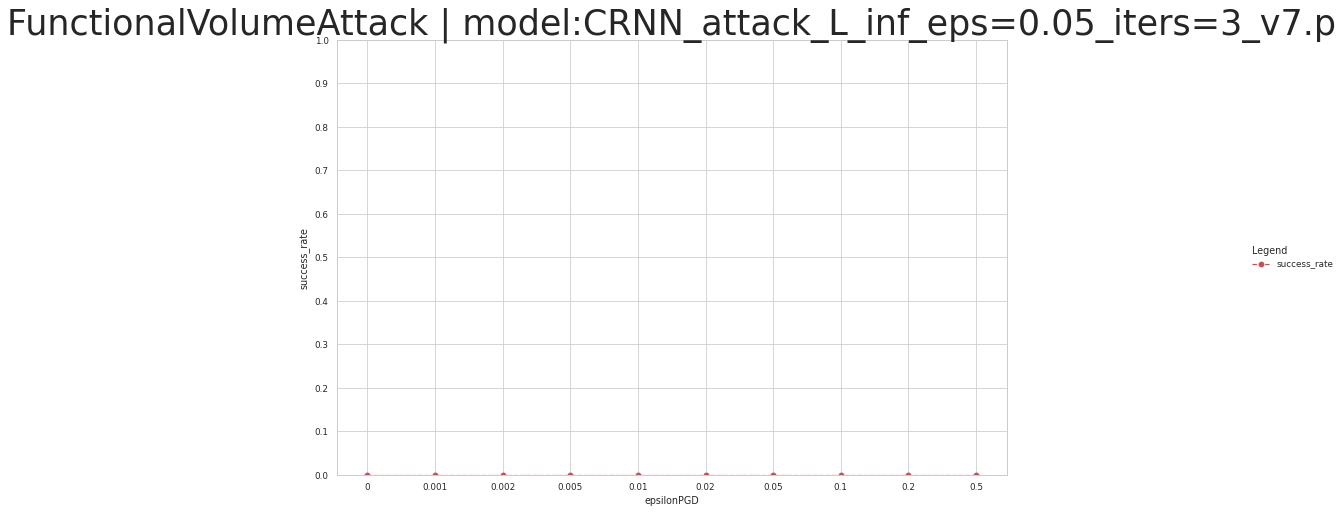

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0015_Evaluation_Final/backup.pickle"


In [8]:
from utils.RobustnessExperiment import RobustnessExperiment, load_experiment
experiment = load_experiment(exp_folder = "0015_Evaluation_Final")
for m in models:
    experiment.run(m, CRNNPLModule)